# BANK

## Setup

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from aif360.datasets import BankDataset

In [32]:
# Load the dataset
dataset_b = BankDataset()

# Convert to pandas DataFrame
df_b, _ = dataset_b.convert_to_dataframe()

## Get To Know Data

In [33]:
df_b.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month=sep,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,day_of_week=wed,poutcome=failure,poutcome=nonexistent,poutcome=success,y
0,1.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,139.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
df_b.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job=admin.', 'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed', 'job=services',
       'job=student', 'job=technician', 'job=unemployed', 'marital=divorced',
       'marital=married', 'marital=single', 'education=basic.4y',
       'education=basic.6y', 'education=basic.9y', 'education=high.school',
       'education=illiterate', 'education=professional.course',
       'education=university.degree', 'default=no', 'default=yes',
       'housing=no', 'housing=yes', 'loan=no', 'loan=yes', 'contact=cellular',
       'contact=telephone', 'month=apr', 'month=aug', 'month=dec', 'month=jul',
       'month=jun', 'month=mar', 'month=may', 'month=nov', 'month=oct',
       'month=sep', 'day_of_week=fri', 'day_of_week=mon', 'day_of_week=thu',
       'day_of_week=tue', 'day_of_week=wed

In [35]:
df_b.shape

(30488, 58)

## Filter

In [36]:
# Apply the filters
for col in df_b.columns:
    df_b = df_b[~df_b[col].isin(["", " "])]

In [37]:
df_b.shape

(30488, 58)

In [38]:
df_b['previous'].value_counts()

previous
0.0    25836
1.0     3752
2.0      633
3.0      190
4.0       56
5.0       16
6.0        4
7.0        1
Name: count, dtype: int64

In [39]:
df_b_reduced = df_b[df_b["previous"].isin([0.0])]

In [40]:
df_b_reduced.shape

(25836, 58)

## Duplicates & Null Values

In [41]:
df_b_reduced.isnull().sum()

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
job=admin.                       0
job=blue-collar                  0
job=entrepreneur                 0
job=housemaid                    0
job=management                   0
job=retired                      0
job=self-employed                0
job=services                     0
job=student                      0
job=technician                   0
job=unemployed                   0
marital=divorced                 0
marital=married                  0
marital=single                   0
education=basic.4y               0
education=basic.6y               0
education=basic.9y               0
education=high.school            0
education=illiterate

In [42]:
df_b.duplicated().value_counts()

False    30448
True        40
Name: count, dtype: int64

In [43]:
df_b_non_dup = df_b.drop_duplicates()

In [44]:
df_b_non_dup

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month=sep,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,day_of_week=wed,poutcome=failure,poutcome=nonexistent,poutcome=success,y
0,1.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,139.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,334.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41184,1.0,383.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41185,1.0,189.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41186,1.0,442.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [45]:
df_b_reduced.duplicated().value_counts()

False    25796
True        40
Name: count, dtype: int64

In [46]:
df_b_reduced_non_dup = df_b_reduced.drop_duplicates()

In [47]:
df_b_reduced_non_dup

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month=sep,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,day_of_week=wed,poutcome=failure,poutcome=nonexistent,poutcome=success,y
0,1.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,139.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,1.0,281.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41183,0.0,334.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41184,1.0,383.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41185,1.0,189.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Encoding

In [48]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30488 non-null  float64
 1   duration                       30488 non-null  float64
 2   campaign                       30488 non-null  float64
 3   pdays                          30488 non-null  float64
 4   previous                       30488 non-null  float64
 5   emp.var.rate                   30488 non-null  float64
 6   cons.price.idx                 30488 non-null  float64
 7   cons.conf.idx                  30488 non-null  float64
 8   euribor3m                      30488 non-null  float64
 9   nr.employed                    30488 non-null  float64
 10  job=admin.                     30488 non-null  float64
 11  job=blue-collar                30488 non-null  float64
 12  job=entrepreneur               30488 non-null  floa

In [49]:
categorical_cols = df_b.select_dtypes(include=['object', 'category']).columns

# Attempt to convert object columns to numeric
for col in categorical_cols:
    try:
        df_b[col] = pd.to_numeric(df_b[col])
    except ValueError:
        print(f"Column '{col}' cannot be converted to numeric.")

In [50]:
catvar = [key for key in dict(df_b.dtypes)
             if dict(df_b.dtypes)[key] in ['object'] ] # Categorical Variable

for cat in catvar:
    df_b[cat] = LabelEncoder().fit_transform(df[cat])

In [51]:
categorical_cols = df_b.select_dtypes(include=['object', 'category']).columns

In [52]:
print(categorical_cols)

Index([], dtype='object')


## High Correlations

In [53]:
corrmat = df_b.corr().abs()

upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [54]:
print(to_drop)

['euribor3m', 'default=yes', 'housing=yes', 'loan=yes', 'contact=telephone', 'poutcome=success']


In [55]:
corrmat['euribor3m'].sort_values(ascending = False)

euribor3m                        1.000000
emp.var.rate                     0.969412
nr.employed                      0.944871
cons.price.idx                   0.667292
poutcome=nonexistent             0.470402
previous                         0.438863
contact=cellular                 0.383964
contact=telephone                0.383964
poutcome=failure                 0.362333
month=apr                        0.322834
y                                0.315869
pdays                            0.295188
month=jul                        0.290655
poutcome=success                 0.279786
cons.conf.idx                    0.243637
age                              0.218864
month=sep                        0.189770
month=oct                        0.184834
month=aug                        0.176879
month=mar                        0.161879
month=may                        0.142501
campaign                         0.140836
job=student                      0.135431
job=retired                      0

In [56]:
corrmat['default=yes'].sort_values(ascending = False)

default=no                       1.000000
default=yes                      1.000000
day_of_week=tue                  0.020135
job=unemployed                   0.019953
education=professional.course    0.014931
month=aug                        0.014137
job=technician                   0.012592
marital=married                  0.008551
nr.employed                      0.007460
education=university.degree      0.007144
contact=telephone                0.006954
contact=cellular                 0.006954
euribor3m                        0.006883
poutcome=failure                 0.006874
month=nov                        0.006808
month=may                        0.006793
marital=single                   0.006645
job=admin.                       0.006287
emp.var.rate                     0.005985
duration                         0.005919
cons.conf.idx                    0.005252
day_of_week=thu                  0.005111
day_of_week=mon                  0.005052
poutcome=nonexistent             0

In [57]:
corrmat['housing=yes'].sort_values(ascending = False)

housing=no                       1.000000
housing=yes                      1.000000
contact=cellular                 0.080567
contact=telephone                0.080567
cons.price.idx                   0.077432
emp.var.rate                     0.059164
euribor3m                        0.058551
month=jun                        0.052823
loan=no                          0.046994
loan=yes                         0.046994
nr.employed                      0.045070
cons.conf.idx                    0.036032
month=nov                        0.031316
month=apr                        0.026405
poutcome=nonexistent             0.025108
poutcome=failure                 0.022108
month=may                        0.021771
previous                         0.021081
month=aug                        0.020973
month=mar                        0.017844
education=basic.4y               0.015137
education=high.school            0.014542
day_of_week=thu                  0.012878
education=university.degree      0

In [58]:
corrmat['loan=yes'].sort_values(ascending = False)

loan=no                          1.000000
loan=yes                         1.000000
housing=no                       0.046994
housing=yes                      0.046994
job=admin.                       0.023491
cons.conf.idx                    0.018878
month=jul                        0.014147
month=oct                        0.012832
job=retired                      0.011153
job=technician                   0.010569
month=aug                        0.009978
education=university.degree      0.009649
day_of_week=fri                  0.009535
month=dec                        0.009395
contact=telephone                0.009017
contact=cellular                 0.009017
education=illiterate             0.008180
job=self-employed                0.008152
day_of_week=tue                  0.007812
age                              0.006629
job=housemaid                    0.006623
campaign                         0.006597
duration                         0.006320
education=basic.4y               0

In [59]:
corrmat['contact=telephone'].sort_values(ascending = False)

contact=cellular                 1.000000
contact=telephone                1.000000
cons.price.idx                   0.564491
euribor3m                        0.383964
emp.var.rate                     0.380922
month=jun                        0.367496
month=may                        0.317829
nr.employed                      0.259555
month=aug                        0.256011
poutcome=nonexistent             0.231077
cons.conf.idx                    0.225466
previous                         0.201760
poutcome=failure                 0.195410
month=nov                        0.171018
month=jul                        0.168539
month=apr                        0.149088
y                                0.143859
pdays                            0.115152
poutcome=success                 0.108918
education=university.degree      0.086598
housing=no                       0.080567
housing=yes                      0.080567
campaign                         0.079889
age                              0

In [60]:
corrmat['poutcome=success'].sort_values(ascending = False)

poutcome=success                 1.000000
pdays                            0.951930
previous                         0.527393
poutcome=nonexistent             0.475157
nr.employed                      0.350337
y                                0.319874
euribor3m                        0.279786
emp.var.rate                     0.254479
month=sep                        0.146896
age                              0.117152
month=oct                        0.110742
contact=cellular                 0.108918
contact=telephone                0.108918
cons.conf.idx                    0.094996
job=retired                      0.075694
month=dec                        0.075372
job=student                      0.073954
poutcome=failure                 0.072152
month=may                        0.069075
cons.price.idx                   0.065387
month=mar                        0.057233
job=blue-collar                  0.053365
campaign                         0.052282
duration                         0

<Axes: >

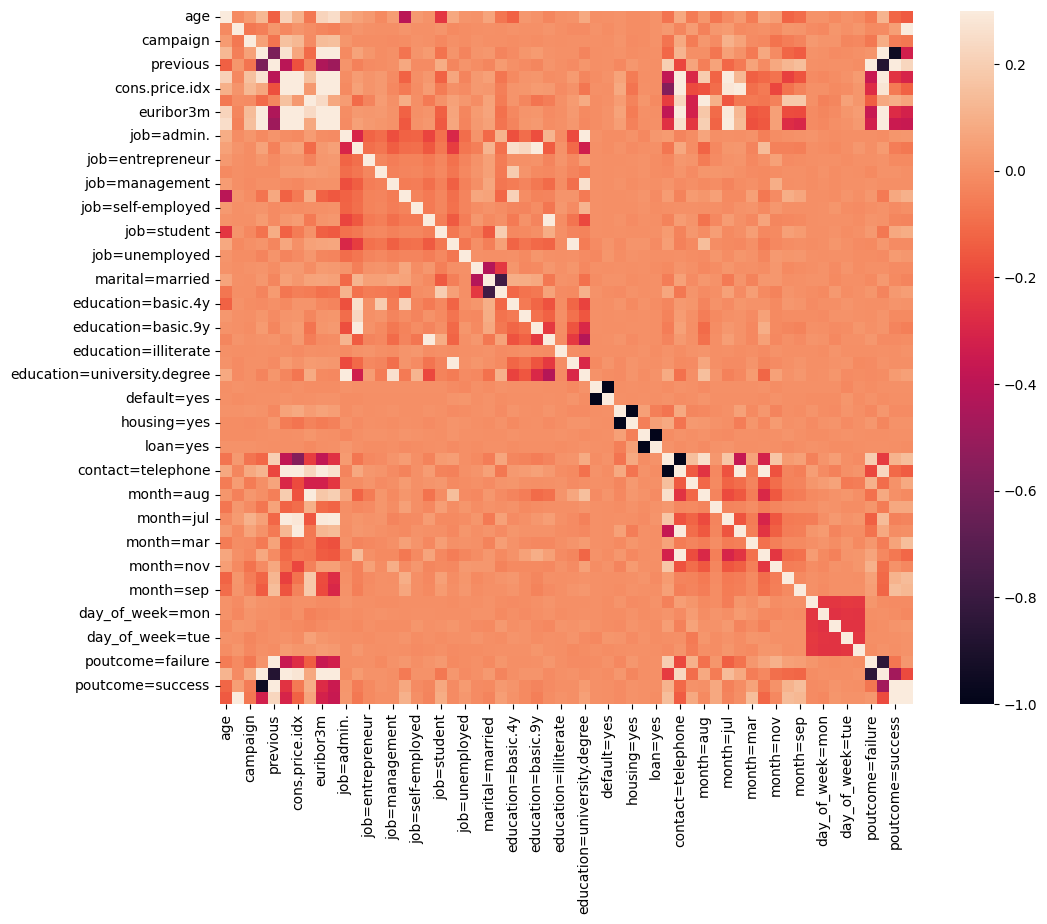

In [62]:
corrmat = df_b.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.3, square=True)

In [63]:
df_b.drop("y", axis=1).apply(lambda x: (x.corr(df_b['y']))).sort_values(ascending=False)

duration                         0.393530
poutcome=success                 0.319874
previous                         0.228003
month=mar                        0.146298
contact=cellular                 0.143859
month=oct                        0.141358
month=sep                        0.124378
job=retired                      0.102376
job=student                      0.088617
month=apr                        0.077764
month=dec                        0.074600
cons.conf.idx                    0.061638
education=university.degree      0.046619
marital=single                   0.042191
job=admin.                       0.024025
poutcome=failure                 0.021745
job=unemployed                   0.020917
day_of_week=thu                  0.016853
housing=yes                      0.010071
education=basic.4y               0.009102
day_of_week=tue                  0.008771
education=illiterate             0.008351
day_of_week=wed                  0.008305
loan=no                          0

In [64]:
df_b

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month=sep,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,day_of_week=wed,poutcome=failure,poutcome=nonexistent,poutcome=success,y
0,1.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,139.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,334.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41184,1.0,383.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41185,1.0,189.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41186,1.0,442.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [65]:
df_b['age'].value_counts()

age
1.0    28742
0.0     1746
Name: count, dtype: int64

In [92]:
df_b_reduced.to_csv("./data/bank_reduced.csv")

In [93]:
df_b_reduced_non_dup.to_csv("./data/bank_reduced_dup.csv")

In [94]:
df_b_non_dup.to_csv("./data/bank_dup.csv")

# COMPAS

In [95]:
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_compas

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
import pandas as pd

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
from aif360.datasets import CompasDataset

# Load the dataset
dataset = CompasDataset()

# Convert to pandas DataFrame
df, _ = dataset.convert_to_dataframe()

In [100]:
df_3 = pd.read_csv("./data/compas-scores-two-years.csv")

In [101]:
df_3.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [102]:
# Indices of data samples to keep
ix = df_3['days_b_screening_arrest'] <= 30
ix = (df_3['days_b_screening_arrest'] >= -30) & ix
ix = (df_3['is_recid'] != -1) & ix
ix = (df_3['c_charge_degree'] != "O") & ix
ix = (df_3['score_text'] != 'N/A') & ix
df_3 = df_3.loc[ix,:]

In [103]:
features_to_keep=['sex', 'age', 'age_cat', 'race',
                     'juv_fel_count', 'juv_misd_count', 'juv_other_count',
                     'priors_count', 'c_charge_degree', 'c_charge_desc',
                     'two_year_recid']

In [104]:
df_3 = df_3[features_to_keep]

In [105]:
df_3.shape

(6172, 11)

In [106]:
dataset_2 = load_preproc_data_compas()

C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\aif360\algorithms\preprocessing\optim_preproc_helpers\data_preproc_functions.py:163: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfcutQ['sex'] = dfcutQ['sex'].replace({'Female': 1.0, 'Male': 0.0})


In [107]:
# Convert to pandas DataFrame
df_2, _ = dataset_2.convert_to_dataframe()

In [108]:
# Display the first few rows of the dataset
print(df_2.head())

    sex  race  age_cat=25 to 45  age_cat=Greater than 45  \
3   0.0   0.0               1.0                      0.0   
4   0.0   0.0               0.0                      0.0   
8   0.0   1.0               1.0                      0.0   
10  1.0   1.0               1.0                      0.0   
14  0.0   1.0               1.0                      0.0   

    age_cat=Less than 25  priors_count=0  priors_count=1 to 3  \
3                    0.0             1.0                  0.0   
4                    1.0             0.0                  0.0   
8                    0.0             0.0                  0.0   
10                   0.0             1.0                  0.0   
14                   0.0             1.0                  0.0   

    priors_count=More than 3  c_charge_degree=F  c_charge_degree=M  \
3                        0.0                1.0                0.0   
4                        1.0                1.0                0.0   
8                        1.0          

In [109]:
df_2.shape

(5278, 11)

In [110]:
df_2.columns

Index(['sex', 'race', 'age_cat=25 to 45', 'age_cat=Greater than 45',
       'age_cat=Less than 25', 'priors_count=0', 'priors_count=1 to 3',
       'priors_count=More than 3', 'c_charge_degree=F', 'c_charge_degree=M',
       'two_year_recid'],
      dtype='object')

In [111]:
# Apply the filters
for col in df_2.columns:
    df_2 = df_2[~df_2[col].isin(["", " "])]

In [112]:
# Apply the filters
for col in df_3.columns:
    df_3 = df_3[~df_3[col].isin(["", " "])]

In [113]:
df_2.shape

(5278, 11)

In [114]:
df_3.shape

(6172, 11)

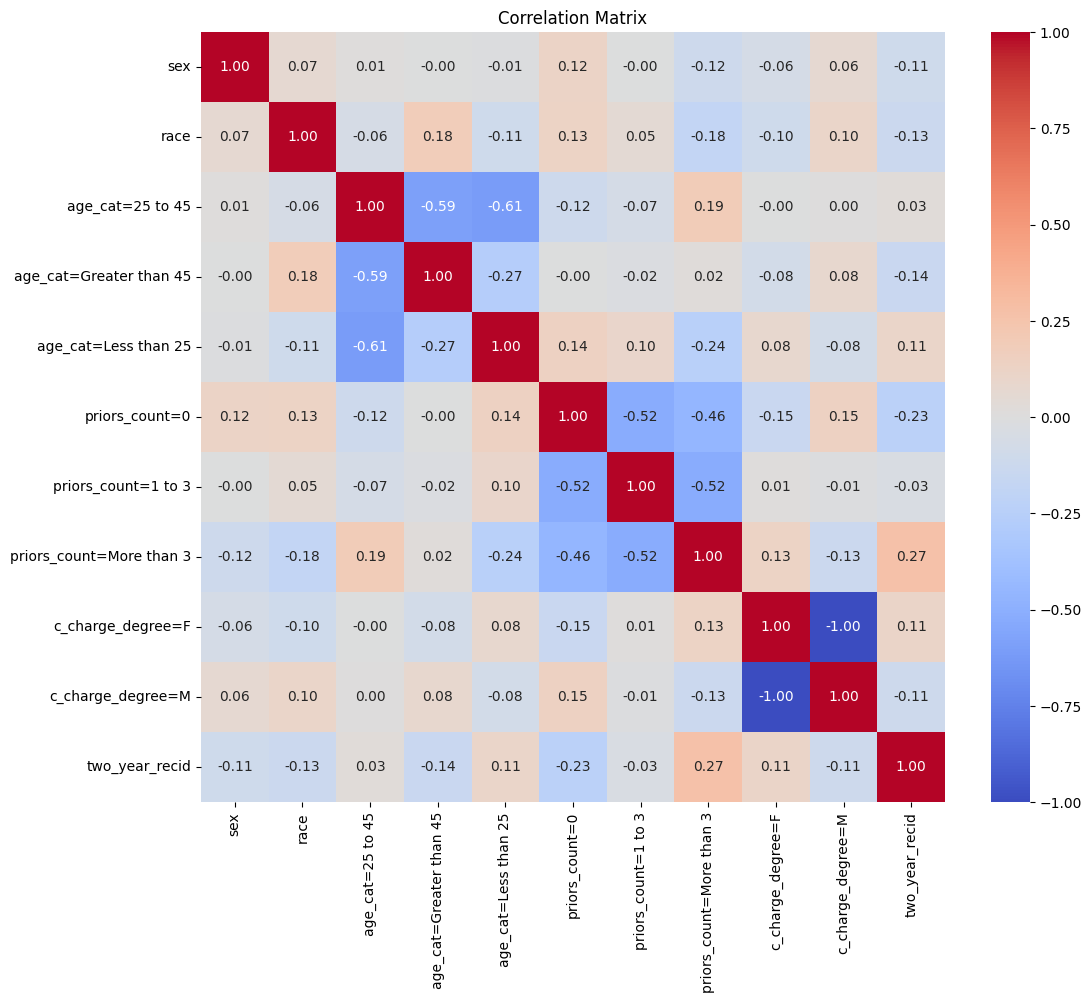

In [115]:
# Correlation matrix
corr = df_2.corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [116]:
df_3['race'].value_counts()

race
African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: count, dtype: int64

In [117]:
catvar = [key for key in dict(df_3.dtypes)
             if dict(df_3.dtypes)[key] in ['object'] ] # Categorical Variable

catvar

['sex', 'age_cat', 'race', 'c_charge_degree', 'c_charge_desc']

In [118]:
df_3['sex'] = df_3['sex'].map({'Male': 0, 'Female': 1})

In [119]:
for cat in catvar:
    df_3[cat] = LabelEncoder().fit_transform(df_3[cat])

In [120]:
df_3.head()

,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,two_year_recid
0,0,69,1,5,0,0,0,0,0,15,0
1,0,34,0,0,0,0,0,0,0,150,1
2,0,24,2,0,0,0,1,4,0,282,1
5,0,44,0,5,0,0,0,0,1,38,0
6,0,41,0,2,0,0,0,14,0,261,1


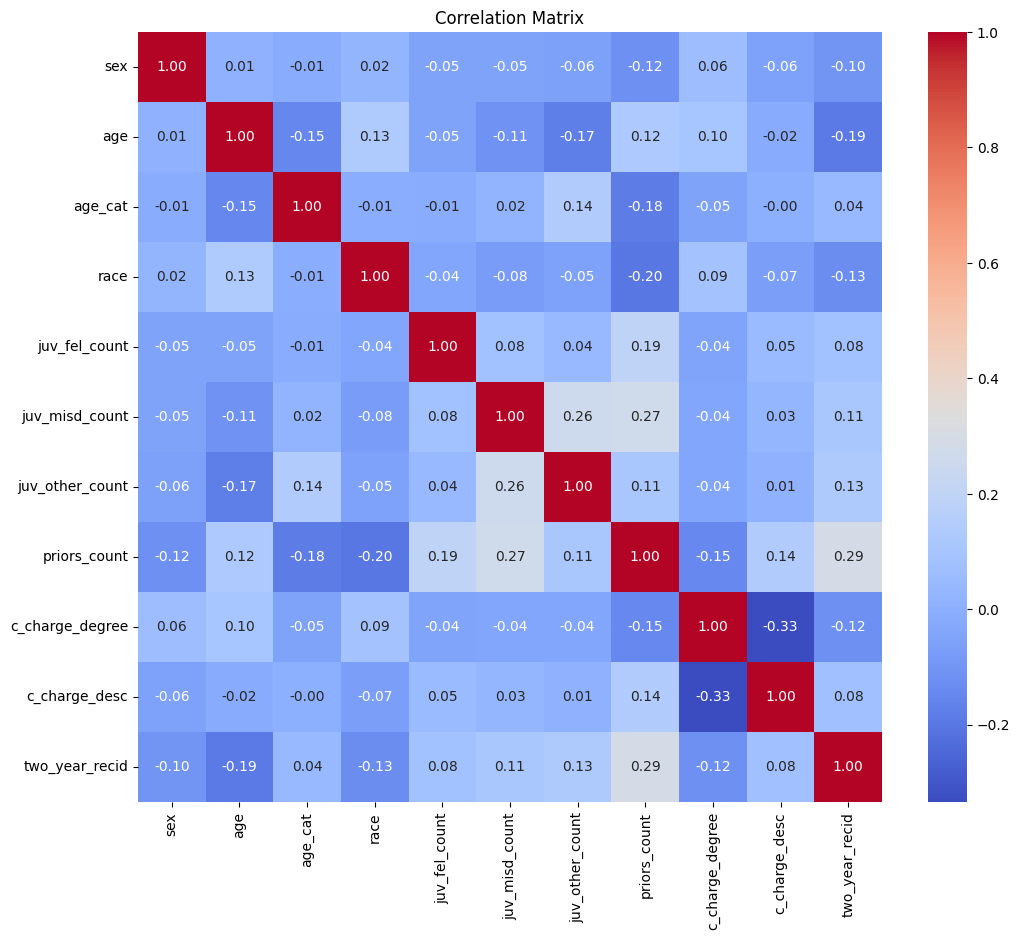

In [121]:
# Correlation matrix
corr = df_3.corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [122]:
df_3.to_csv("./data/compas_preprocessed.csv")